# Programming for Data Analysis Project
### Data Set Simulation: Healthy Ireland Survey 2019

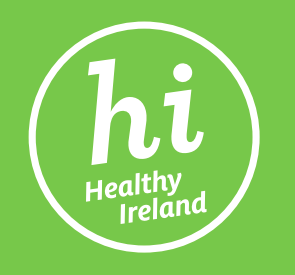 

### Submission Date : 03/01/2022

#### Introduction

The aim of this project is to simulate data using Python that mirrors a real-world phenomenon. The following Python modules are used to simulate and investigate the dataset and the relationships between its dependent and independent variables:
- NumPy Random
- SciPy Stats
- Pandas
- Matplotlib Pyplot/Seaborn

The phenomenon I've chosen is the general health of the Irish population, and the simulation is based largely on the results of the 2019 Healthy Ireland survey. This is an annual, interviewer-administered, face to face study commissioned by the Department of Health, and is part of the Healthy Ireland framework to improve the health and wellbeing of people living in Ireland. 

Its main objectives are: 
- To provide current and credible data to monitor the efficacy of other Healthy Ireland framework initiatives 
- To ensure Ireland meets its international reporting requiremnts
- Support the Department of Health in policy prioritization and awareness-raising initiatives

The survey covers a wide range of topics including physical measurements, alcohol and tobacco consumption, general health, sleep quality and physical activity levels. 

I chose this survey as the basis for the simulated dataset as my undergraduate degree was in Nutritional Science, with a strong emphasis on the relationship between diet and public health. Although I no longer work in this area, I have maintained a strong interest in it.

The simulation has three main components:
1. Demographic Factors (independent variables) - age, gender, employment and socioeconomic status
2. Health Outcomes  (dependent variables) - BMI, physical activity levels, alcohol consumption, smoking status, hours sleep. 
3. Relationship between independent and dependent Variables, based on figures reported in the Healthy Ireland survey

In summary, this project will simulate the data provided by the Healthy Ireland survey respondents, and recreate the relationships between demographic factors and reported health outcomes.